In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/home/d/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_data = pd.read_pickle("../data/raw/not_null.pkl")

In [3]:
df_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36,13.99,123.03,C,C4,leadman,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36,11.99,820.28,C,C1,Engineer,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60,10.78,432.66,B,B4,truck driver,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60,22.45,289.91,F,F1,Contract Specialist,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
5,68426831,11950.0,11950.0,11950.0,36,13.44,405.18,C,C3,Veterinary Tecnician,...,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N


In [4]:
df = df_data.sample(frac=0.1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123058 entries, 1807142 to 1499888
Data columns (total 87 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   id                          123058 non-null  object  
 1   loan_amnt                   123058 non-null  float64 
 2   funded_amnt                 123058 non-null  float64 
 3   funded_amnt_inv             123058 non-null  float64 
 4   term                        123058 non-null  int64   
 5   int_rate                    123058 non-null  float64 
 6   installment                 123058 non-null  float64 
 7   grade                       123058 non-null  category
 8   sub_grade                   123058 non-null  category
 9   emp_title                   123058 non-null  object  
 10  emp_length                  123058 non-null  category
 11  home_ownership              123058 non-null  category
 12  annual_inc                  123058 non-null  float6

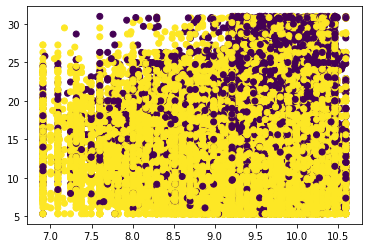

In [6]:
plt.scatter(np.log(df["loan_amnt"]), df["int_rate"], c=df["loan_status"])


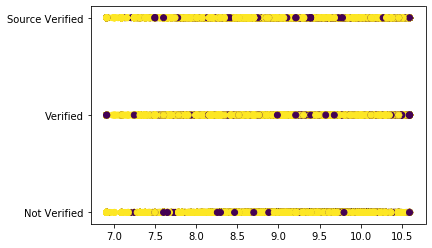

In [7]:
plt.scatter(np.log(df["loan_amnt"]), df["verification_status"], c=df["loan_status"])

In [8]:
df["verification_status"].value_counts()

Source Verified    50093
Not Verified       37225
Verified           35740
Name: verification_status, dtype: int64

In [9]:
len(df[(df["verification_status"] == "Verified") & (df["loan_status"] == 1)])

26704

In [10]:
len(df[(df["verification_status"] == "Verified") & (df["loan_status"] == 0)])

9036

In [11]:
len(df[(df["verification_status"] == "Not Verified") & (df["loan_status"] == 0)])

6034

In [12]:
len(df[(df["verification_status"] == "Not Verified") & (df["loan_status"] == 1)])

31191

In [13]:
len(df[(df["verification_status"] == "Source Verified") & (df["loan_status"] == 1)])

38679

In [14]:
len(df[(df["verification_status"] == "Source Verified") & (df["loan_status"] == 0)])

11414

In [15]:
verification_status_count = df[["verification_status", "loan_status"]].value_counts()

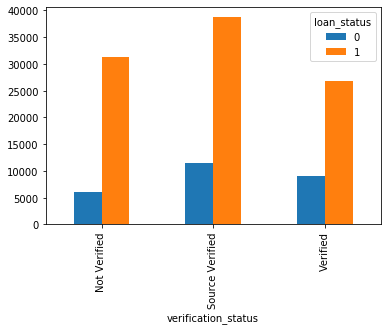

In [16]:
verification_status_count.unstack().plot(kind="bar")

In [17]:
zip_count = df["zip_code"].value_counts()

In [18]:
zip_list = zip_count[zip_count > 1000].index.values

In [19]:
zip_filtered_df = df[df["zip_code"].isin(zip_list)]

In [20]:
zip_filtered_df[["loan_status", "zip_code", "id"]].groupby(by=["zip_code", "loan_status"]).count()

id
zip_code loan_status      
112xx    0             307
         1             979
300xx    0             213
         1             939
331xx    0             281
         1             797
606xx    0             201
         1             937
750xx    0             260
         1            1080
891xx    0             257
         1             756
945xx    0             290
         1            1092

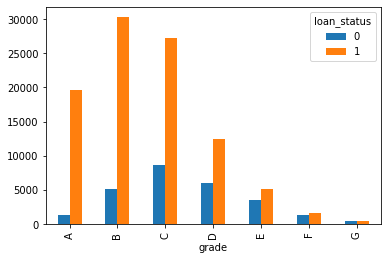

In [28]:
df[["grade", "loan_status"]].value_counts().unstack().plot(kind="bar")

<Figure size 1152x576 with 0 Axes>

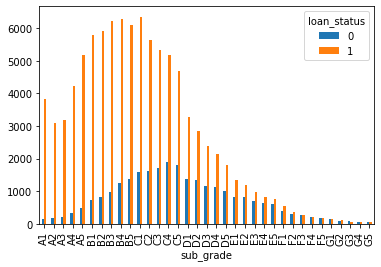

In [36]:
plt.figure(figsize=(16, 8))
df[["sub_grade", "loan_status"]].value_counts().unstack().plot(kind="bar")

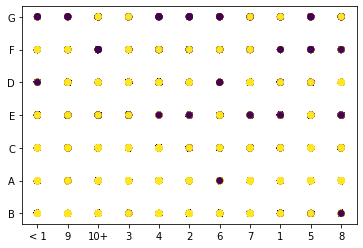

In [40]:
plt.scatter(df["emp_length"], df["grade"], c=df["loan_status"])